In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [13]:
housing_data = fetch_california_housing()
X_train, X_test, Y_train, Y_test = train_test_split(housing_data['data'], housing_data['target'], train_size=0.8, random_state=42)


In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

models = [LinearRegression(), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha=0.01)]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    print(f"{mse=}, {r2=}")



mse=0.555891598695242, r2=0.5757877060324526
mse=0.5558907139437498, r2=0.5757883812044842
mse=0.5444491581246518, r2=0.5845196673976369
mse=0.5456722465265749, r2=0.5835863035225168


Now lets investigate the effect of different regularization parameter ($\lambda$) on coefficients of regression model and plot the coefficients vs. lambda for each regularization method.

In [26]:
import matplotlib.pyplot as plt
coefficients = []
lambdas = [l for l in range(0, 10000)]


for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(X_train, Y_train)
    coefficients.append(model.coef_)

coefficients = pd.DataFrame(coefficients, columns=housing_data['feature_names'])
print(coefficients.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0  0.448675  0.009724 -0.123323   0.783145   -0.000002 -0.003526 -0.419792  \
1  0.448511  0.009726 -0.123014   0.781417   -0.000002 -0.003526 -0.419787   
2  0.448348  0.009728 -0.122706   0.779696   -0.000002 -0.003525 -0.419781   
3  0.448185  0.009729 -0.122400   0.777983   -0.000002 -0.003525 -0.419775   
4  0.448024  0.009731 -0.122095   0.776278   -0.000002 -0.003524 -0.419768   

   Longitude  
0  -0.433708  
1  -0.433681  
2  -0.433653  
3  -0.433625  
4  -0.433597  


<Axes: xlabel='lambdas'>

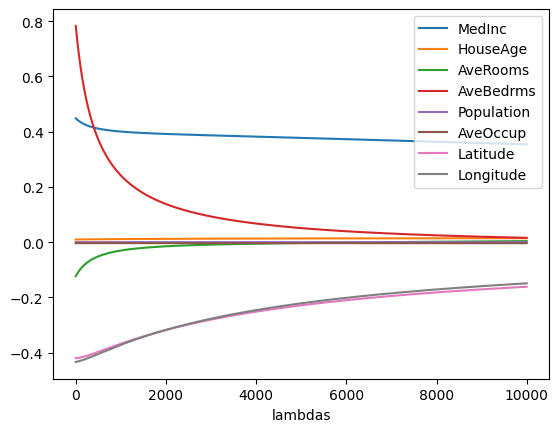

In [29]:
coefficients['lambdas'] = lambdas
coefficients.plot(x='lambdas', y=housing_data['feature_names'])

In [34]:
coefficients = []
lambdas = [l for l in np.linspace(0, 1, 4000)]


for lam in lambdas:
    model = Lasso(alpha=lam)
    model.fit(X_train, Y_train)
    coefficients.append(model.coef_)

coefficients = pd.DataFrame(coefficients, columns=housing_data['feature_names'])
print(coefficients.head())

/var/folders/bh/79ms89214n70lb56qjzk005c0000gn/T/ipykernel_39205/3616864695.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
/Users/alejandro/Programming/Courses/EEC189G-Spring23/HW2/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/alejandro/Programming/Courses/EEC189G-Spring23/HW2/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0  0.448675  0.009724 -0.123323   0.783145   -0.000002 -0.003526 -0.419792  \
1  0.447681  0.009739 -0.121426   0.772649   -0.000002 -0.003522 -0.419475   
2  0.446686  0.009753 -0.119529   0.762154   -0.000002 -0.003518 -0.419157   
3  0.445692  0.009768 -0.117632   0.751657   -0.000002 -0.003514 -0.418839   
4  0.444697  0.009783 -0.115735   0.741162   -0.000002 -0.003510 -0.418521   

   Longitude  
0  -0.433708  
1  -0.433238  
2  -0.432768  
3  -0.432298  
4  -0.431828  


<Axes: xlabel='lambdas'>

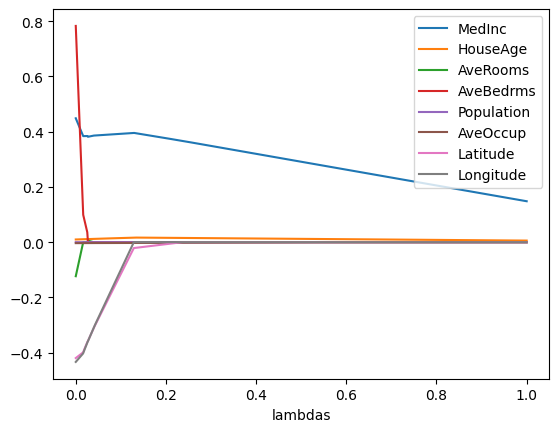

In [35]:
coefficients['lambdas'] = lambdas
coefficients.plot(x='lambdas', y=housing_data['feature_names'])

It seems that the coefficients converge to zero as we increase the size of the lambda parameter.